<div style="
    padding: 15px;
    color: #333;
    margin: 20px;
    font-size: 16px;
    display: inline-block;
    border-radius: 8px;
    border: 2px solid #007BFF;
    background-color: #F8F9FA;
    overflow: hidden;
    font-weight: 500;
    box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
">
    <strong style="color: #007BFF;">Thank You For Visiting Kagglers</strong>
</div>


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing Modules and Libraries</p>

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import warnings
import calendar
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.compose import make_column_selector
from matplotlib import cm
c1=cm.get_cmap('Accent')
c2=cm.get_cmap('twilight')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Reading Datasets</p>

In [2]:
data1=pd.read_excel("/kaggle/input/marketing-insights-for-e-commerce-company/CustomersData.xlsx")
data2=pd.read_csv("/kaggle/input/marketing-insights-for-e-commerce-company/Discount_Coupon.csv")
data3=pd.read_csv("/kaggle/input/marketing-insights-for-e-commerce-company/Marketing_Spend.csv")
data4=pd.read_csv("/kaggle/input/marketing-insights-for-e-commerce-company/Online_Sales.csv")
data5=pd.read_excel("/kaggle/input/marketing-insights-for-e-commerce-company/Tax_amount.xlsx")

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Transforming Datasets</p>

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [5]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [6]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [7]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [8]:
data6=data1.merge(data4,on='CustomerID')

In [9]:
data7=data6.merge(data5,on='Product_Category')

In [10]:

data2["Month"]=data2['Month'].apply(lambda x: dt.datetime.strptime(x, '%b').month)


In [11]:
data7=data7.merge(data3,left_on='Transaction_Date',right_on='Date')

In [12]:
data7.Transaction_Date=pd.to_datetime(data7.Transaction_Date,format='%m/%d/%Y')

In [13]:
data7['Month']=data7.Transaction_Date.apply(lambda x : x.strftime('%m'))

In [14]:
data7.Month=data7.Month.astype('int')

In [15]:
data7=data7.merge(data2,on=['Month','Product_Category'],how='outer')

In [16]:
data7=data7.dropna()

In [17]:
data7.Month.info()

<class 'pandas.core.series.Series'>
Index: 52524 entries, 0 to 52923
Series name: Month
Non-Null Count  Dtype
--------------  -----
52524 non-null  int64
dtypes: int64(1)
memory usage: 820.7 KB


In [18]:
data7.duplicated().value_counts()

False    52524
Name: count, dtype: int64

In [19]:
data7=data7.drop_duplicates()


In [20]:
data7['Total Prices']=data7.Avg_Price+data7.Delivery_Charges

In [21]:
data7.duplicated().sum()

0

In [22]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  float64       
 1   Gender               52524 non-null  object        
 2   Location             52524 non-null  object        
 3   Tenure_Months        52524 non-null  float64       
 4   Transaction_ID       52524 non-null  float64       
 5   Transaction_Date     52524 non-null  datetime64[ns]
 6   Product_SKU          52524 non-null  object        
 7   Product_Description  52524 non-null  object        
 8   Product_Category     52524 non-null  object        
 9   Quantity             52524 non-null  float64       
 10  Avg_Price            52524 non-null  float64       
 11  Delivery_Charges     52524 non-null  float64       
 12  Coupon_Status        52524 non-null  object        
 13  GST                  52524 non-null 

In [23]:
data=data7
new=data[['Offline_Spend','Online_Spend','Month','Total Prices']].groupby('Month').sum()
mon=list(calendar.month_name)[1:]

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Visualisation</p>



<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>TOP 20 Costliest Purchase ID's </strong>
</div>




Text(0.5, 0, 'Customer ID')

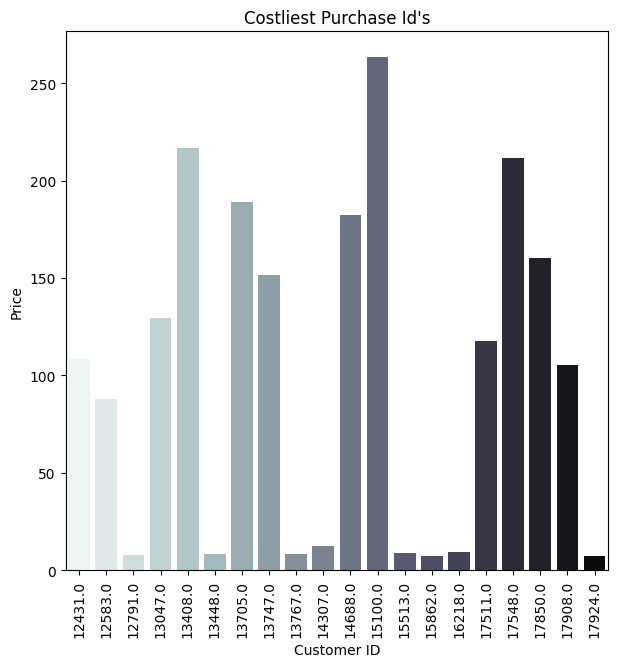

In [24]:
val1=data[['CustomerID','Total Prices']]
x=val1.CustomerID.unique()[:20]
y=val1['Total Prices'].unique()[:20]
fig,axis=plt.subplots(figsize=(7,7))

val1=val1.sort_values(by='Total Prices',ascending=False)
sb.barplot(x=x,y=y,palette='bone_r',ax=axis)
plt.xticks(rotation=90)
plt.title("Costliest Purchase Id's")
plt.ylabel('Price')
plt.xlabel('Customer ID')




<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>TOP 30 Popular Customer ID With Purchase Count</strong>
</div>




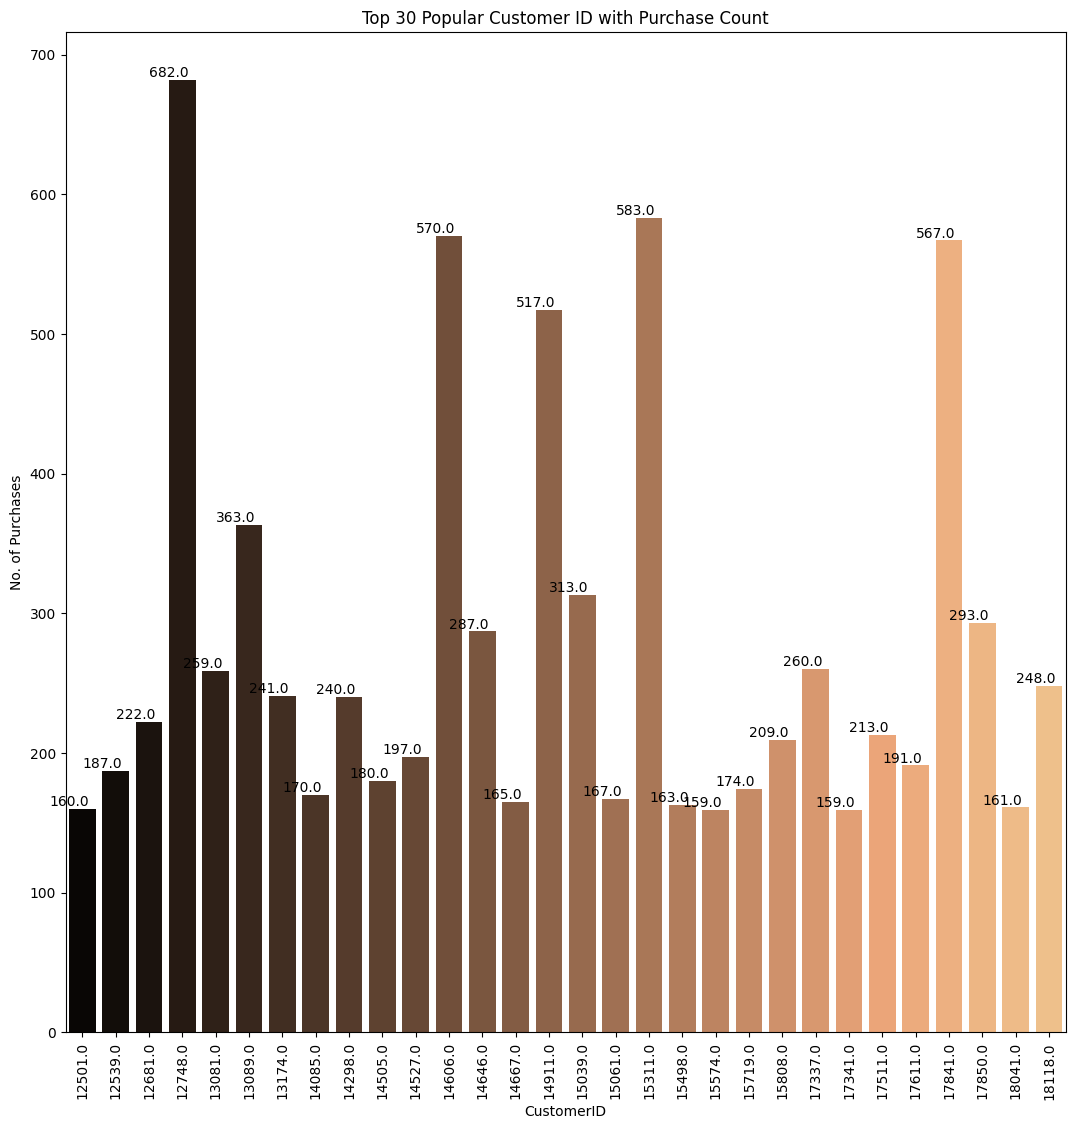

In [25]:
fig=plt.figure(figsize=(10,10))
axis=fig.add_axes([1,1,1,1])
val2=data.CustomerID.value_counts().sort_values(ascending=False).head(30)
sb.barplot(x=val2.index,y=val2,palette='copper',ax=axis)

plt.xticks(rotation=90)
plt.ylabel('No. of Purchases')
plt.title('Top 30 Popular Customer ID with Purchase Count')
for i in axis.patches:
    axis.annotate(i.get_height(),(i.get_x(),i.get_height()),va='bottom',ha='center')


<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Total Male-Female Purchase Comparision</strong>
</div>




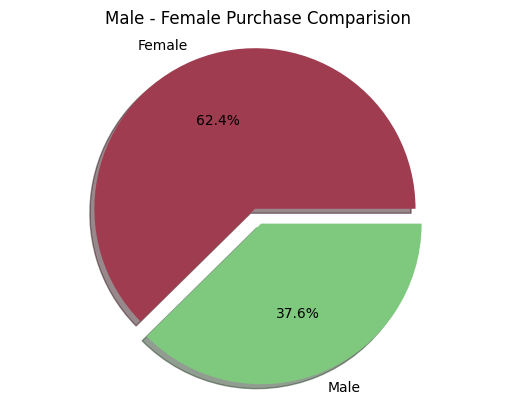

In [26]:
val3=data.Gender.value_counts()
plt.pie(val3,labels=['Female','Male'],autopct="%1.1f%%",shadow=True,explode=(0.1,0),colors=[c2(0.7),c1(0.1)])
plt.axis('equal')
plt.title('Male - Female Purchase Comparision')
sb.set(style='white')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
 - **Females Ocuurence to purchase is more than males.**




<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Tenure Months Frequency Of Customers</strong>
</div>




Text(0.5, 1.0, 'Tenure Months Frequency of Customers')

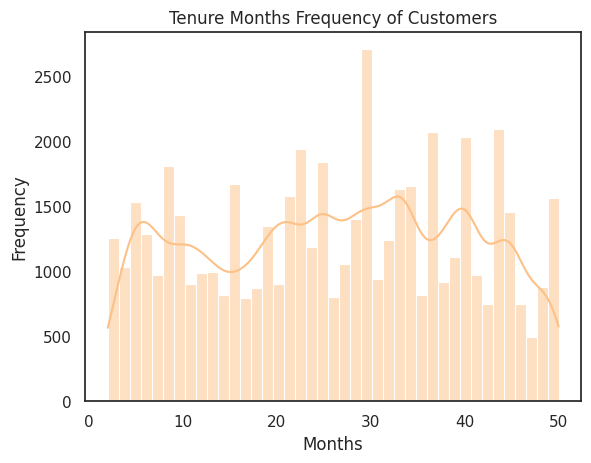

In [27]:
val4=data.Tenure_Months
sb.histplot(val4,kde=True,color=c1(0.3))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Tenure Months Frequency of Customers')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

- **The term "tenure" is often used in the context of customer relationship management to measure how long a customer has been associated with a business. In the case of a shopping dataset, "tenure months" might represent the number of months since a customer first made a purchase or started using a particular service.**

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Product Category Frequency Analysis</strong>
</div>


Text(41.875, 0.5, 'Percentages')

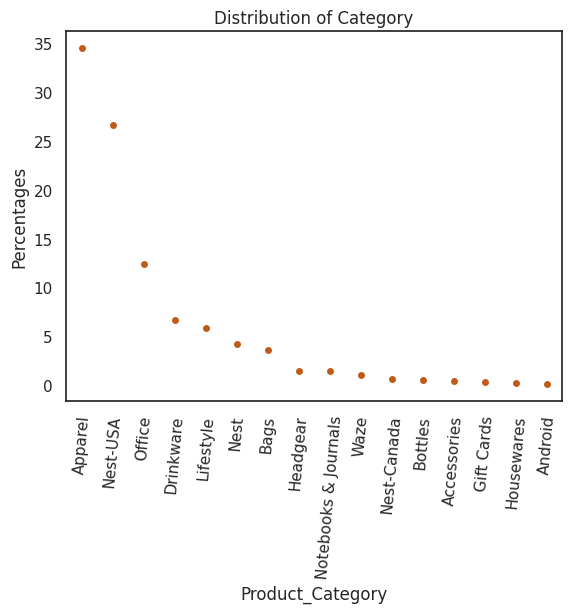

In [28]:
freqdata=data.Product_Category.value_counts()
total=freqdata.sum()
percent=(freqdata.values/total)*100
sb.swarmplot(x=freqdata.index,y=percent,color=c1(0.8))
plt.xticks(rotation=85)
plt.title('Distribution of Category')
plt.ylabel('Percentages')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">


- **Apparel Category has high frequency**

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Heatmap For Correlation</strong>
</div>


Text(0.5, 1.0, 'Heatmap')

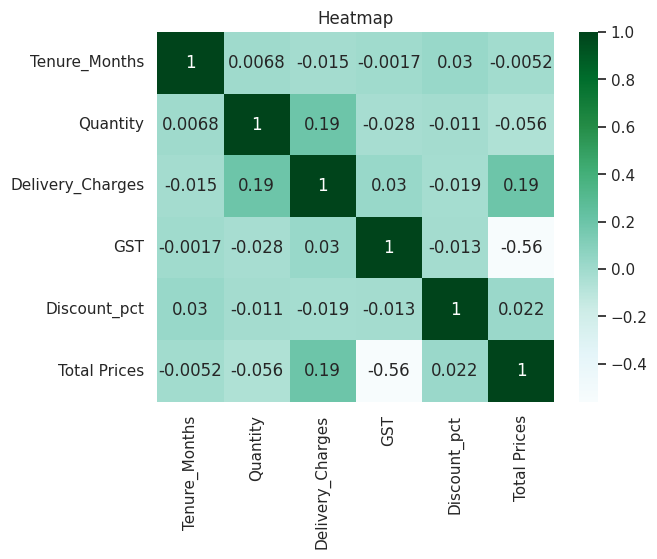

In [29]:
x=make_column_selector(dtype_include=['number'])
newdf=data[x(data)]
newdf.drop(['CustomerID','Transaction_ID','Online_Spend','Month','Offline_Spend','Avg_Price'],axis=1,inplace=True)
sb.heatmap(newdf.corr(),annot=True,cmap='BuGn')
plt.title('Heatmap')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
- **Shows the correlation of different features**
- **1)Total Price and GST are negatively correlated**
- **2)Other all features have less correlation with each other**

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Location Frequencies</strong>
</div>


Text(0.5, 1.0, 'Location Frequencies')

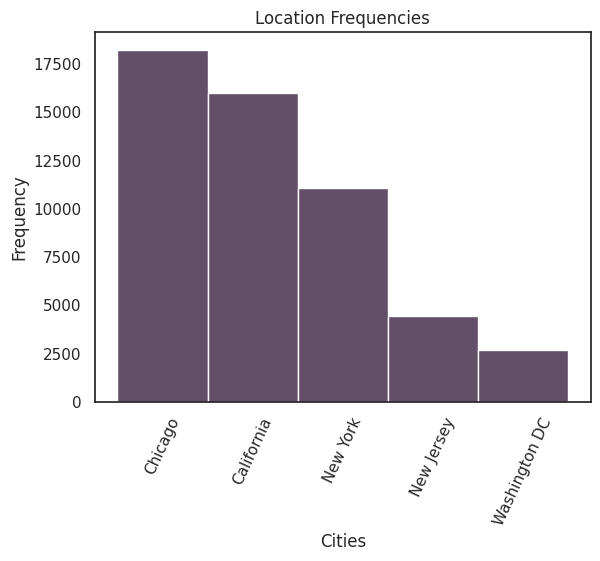

In [30]:
sb.histplot(data.Location,color=c2(0.5))
plt.ylabel('Frequency')
plt.xlabel('Cities')
plt.xticks(rotation=65)
plt.title('Location Frequencies')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
- **Chicago -1st, California -2nd, New York -3rd, New Jersy -4th, Washington DC -5th in Purchase Frequency**

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Coupon Status
    </strong>
</div>


Text(0.5, 1.0, 'Coupon_status')

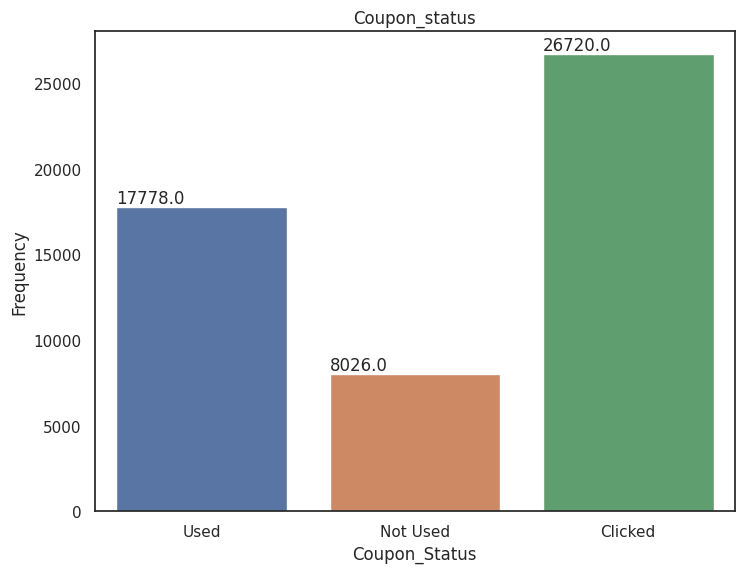

In [31]:
fig=plt.figure()
axis=fig.add_axes([1,1,1,1])
nd1=data.Coupon_Status
sb.countplot(data=nd1,x=nd1,ax=axis)

for i in axis.patches:
    axis.annotate(i.get_height(),(i.get_x(),i.get_height()),va='bottom',ha='left')
plt.ylabel('Frequency')
plt.title('Coupon_status')

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Male-Female Price Spent 
    </strong>
</div>


Text(0.5, 1.0, 'Price Spend')

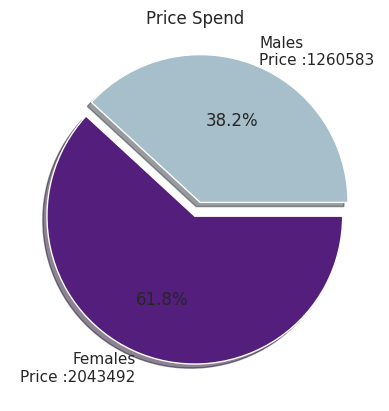

In [32]:
male=data[['Total Prices','Gender']].groupby('Gender').get_group('M')['Total Prices'].sum()
female=data[['Total Prices','Gender']].groupby('Gender').get_group('F')['Total Prices'].sum()
sizes=[round(male),round(female)]
labels=['Males','Females']
plt.pie(sizes,autopct='%1.1f%%',labels=[f'{label}\nPrice :{size}' for label, size in zip(labels, sizes)],shadow=True,explode=(0.1,0),colors=[c2(0.1),c2(0.4)])
plt.title('Price Spend')


<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
- **Female spend nearly 2 times higher than Males**
- **Similarly females occurrence to shop is high by our previous bar plot** 

In [33]:
nd2=data[['Total Prices','Gender','Location']].groupby('Location')
nd3=[]
nd4=[]
for i in data.Location.unique():
    nd3.append((round(nd2.get_group(i)['Total Prices'].sum()),i))
y=list(map(lambda x :x[0],nd3))
x=list(map(lambda x :x[1],nd3))

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Cities With Price Spent 
    </strong>
</div>


Text(0.5, 1.0, 'Cities with Price Spent')

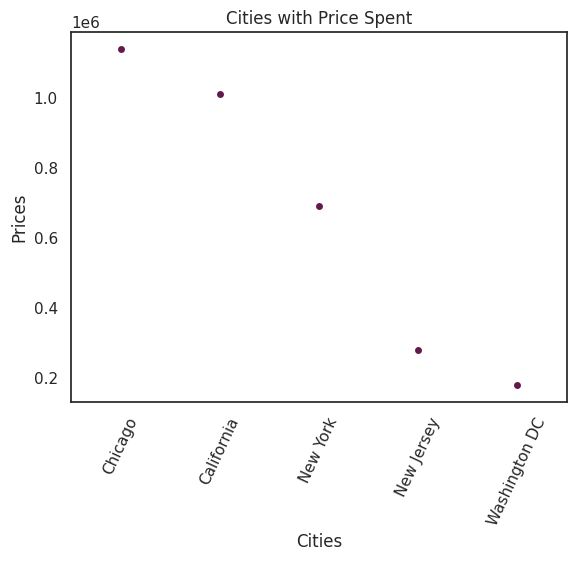

In [34]:
sb.swarmplot(x=x,y=y,color=c2(0.6))
plt.xlabel('Cities')
plt.ylabel('Prices')
plt.xticks(rotation=65)
plt.title('Cities with Price Spent')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
- **The Occurence table and this plots gives same result**
- **Thus, the most frequent cities spents high amount in total**

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Delivery Charges Vs Average Price
    </strong>
</div>


Text(0.5, 1.0, 'Delivery Charges Vs Avg_Price')

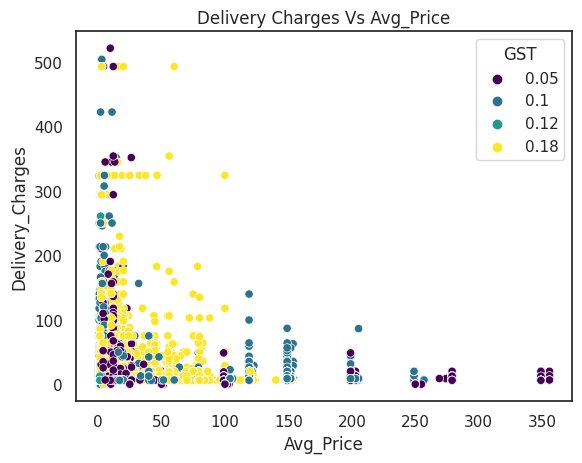

In [35]:
sb.scatterplot(data=data,y='Delivery_Charges',x='Avg_Price',hue='GST',palette='viridis')
plt.title('Delivery Charges Vs Avg_Price')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
- **Low GST Product has high delivery Charges.Nice tactic in profit.Isn't it?**

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Time Series Analaysis </p>

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
- **Time series analysis is a statistical technique that deals with time-ordered data points. It involves studying the patterns and trends in the data to make predictions or gain insights into the underlying processes. Time series data consists of observations or measurements taken at different points in time, and the goal of time series analysis is often to understand and model the structure that generates the data.**

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Total Spend</strong>
</div>


Text(0.5, 1.0, 'Total Spend With Month')

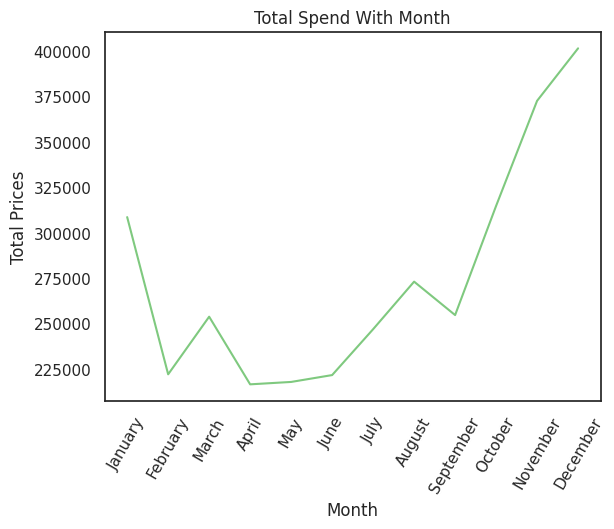

In [36]:
sb.lineplot(y=new['Total Prices'],x=new.index,color=c1(0.1))
plt.xticks(new.index,mon,rotation=60)
plt.title("Total Spend With Month")

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Online Spend</strong>
</div>


Text(0.5, 1.0, 'Total Online Spend With Month')

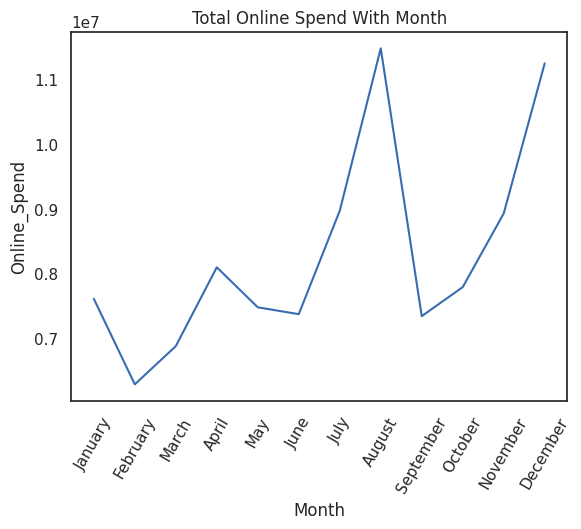

In [37]:
sb.lineplot(y=new.Online_Spend,x=new.index,color=c1(0.5))
plt.xticks(new.index,mon,rotation=60)
plt.title("Total Online Spend With Month")

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Offline Spend</strong>
</div>


Text(0.5, 1.0, 'Total Offline Spend With Month')

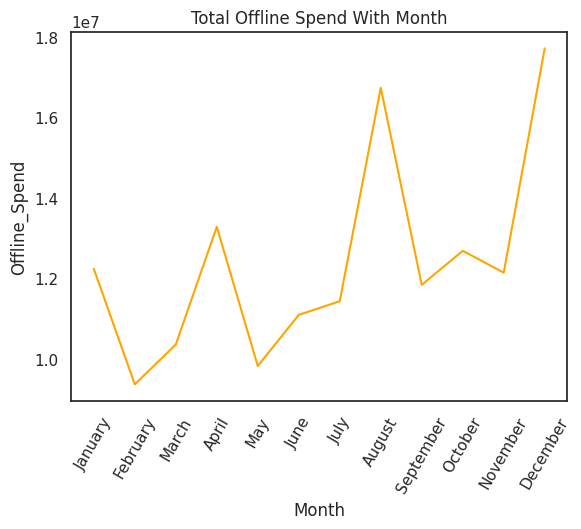

In [38]:
sb.lineplot(y=new.Offline_Spend,x=new.index,color='orange')
plt.xticks(new.index,mon,rotation=60)
plt.title("Total Offline Spend With Month")

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
 - **In all three types (Total,Online,Offline) of Spends, the peak is at August and December Month**

<div style="
    padding: 20px;
    color: #27AE60;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #27AE60;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Total Delivery Charges Per Month</strong>
</div>


Text(0.5, 1.0, 'Total Delivery Charges per Month')

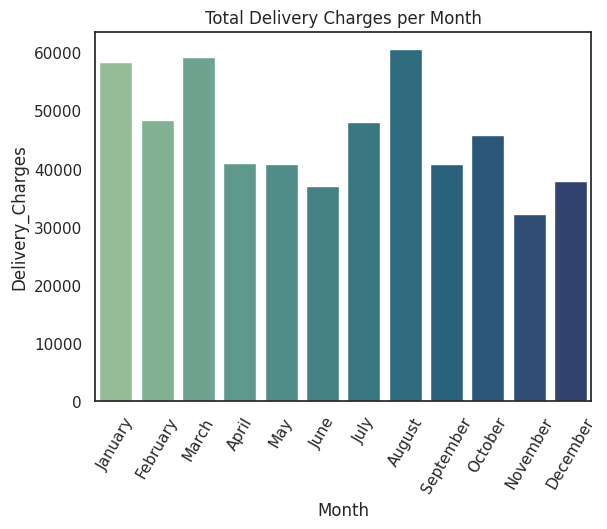

In [39]:
delivery=data[['Delivery_Charges','Month']].groupby('Month').sum()
sb.barplot(data=delivery,x=delivery.index,y='Delivery_Charges',palette='crest')
plt.xticks(range(12),mon,rotation=60)
plt.title("Total Delivery Charges per Month")

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

- **Delivery Charges are high during the first 3 months of year and also at August month**

- **To be Continue**

<div style="
    padding: 20px;
    color: #3498DB;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #3498DB;
    background-color: #2C3E50;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong>Thank U 😊 For Visiting</strong>
</div>
